# Máquinas de vectores soporte con Scikit-learn Tutorial
En este tutorial aprenderás sobre las Máquinas de Vectores Soporte, uno de los algoritmos de aprendizaje automático supervisado más populares y utilizados.

SVM ofrece una precisión muy alta en comparación con otros clasificadores como la regresión logística, y los árboles de decisión. Es conocido por su truco de kernel para manejar espacios de entrada no lineales. Se utiliza en una variedad de aplicaciones tales como la detección de rostros, detección de intrusos, clasificación de correos electrónicos, artículos de noticias y páginas web, clasificación de genes, y el reconocimiento de escritura a mano.

En este tutorial, se utilizará scikit-learn en Python. Si quieres aprender más sobre este paquete de Python, te recomiendo que eches un vistazo a nuestro curso Aprendizaje Supervisado con scikit-learn.

SVM es un algoritmo emocionante y los conceptos son relativamente simples. El clasificador separa los puntos de datos utilizando un hiperplano con la mayor cantidad de margen. Es por eso que un clasificador SVM también se conoce como un clasificador discriminativo. SVM encuentra un hiperplano óptimo que ayuda a clasificar nuevos puntos de datos.

# Máquinas de vectores soporte
En general, las máquinas de vectores de soporte se consideran un método de clasificación, pero pueden emplearse tanto en problemas de clasificación como de regresión. Puede manejar fácilmente múltiples variables continuas y categóricas. SVM construye un hiperplano en un espacio multidimensional para separar las diferentes clases. La SVM genera un hiperplano óptimo de forma iterativa, que se utiliza para minimizar un error. La idea central de SVM es encontrar un hiperplano marginal máximo (MMH) que divida mejor el conjunto de datos en clases.

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

## Vectores de soporte
Los vectores de soporte son los puntos de datos más cercanos al hiperplano. Estos puntos definirán mejor la línea de separación mediante el cálculo de márgenes. Estos puntos son más relevantes para la construcción del clasificador.

## Hiperplano
Un hiperplano es un plano de decisión que separa un conjunto de objetos que pertenecen a clases diferentes.

## Margen
Un margen es un espacio entre las dos líneas de los puntos de clase más cercanos. Se calcula como la distancia perpendicular de la línea a los vectores de soporte o puntos más cercanos. Si el margen es mayor entre las clases, entonces se considera un buen margen, un margen menor es un mal margen.



# ¿Cómo funciona la SVM?
El objetivo principal es segregar el conjunto de datos dado de la mejor manera posible. La distancia entre los dos puntos más cercanos se conoce como margen. El objetivo es seleccionar un hiperplano con el máximo margen posible entre los vectores de soporte en el conjunto de datos dado. SVM busca el máximo hiperplano marginal en los siguientes pasos:

Genera hiperplanos que segregan las clases de la mejor manera. Figura de la izquierda que muestra tres hiperplanos negro, azul y naranja. Aquí, el azul y el naranja tienen mayor error de clasificación, pero el negro separa las dos clases correctamente.

Seleccione el hiperplano derecho con la máxima segregación a partir de los dos puntos de datos más cercanos, como se muestra en la figura de la derecha.

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288454/index2_ub1uzd.png)

Tratar con planos no lineales e inseparables
Algunos problemas no pueden resolverse utilizando hiperplano lineal, como se muestra en la figura siguiente (lado izquierdo).

En tal situación, SVM utiliza un truco de núcleo para transformar el espacio de entrada a un espacio de mayor dimensión, como se muestra a la derecha. Los puntos de datos se representan en los ejes x y z (Z es la suma cuadrada de x e y: z=x^2=y^2). Ahora puede segregar fácilmente estos puntos utilizando la separación lineal.

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png)

# Manos a la obra...

## Construcción de Clasificadores en Scikit-learn
Hasta ahora, usted ha aprendido acerca de los antecedentes teóricos de SVM. Ahora usted aprenderá acerca de su aplicación en Python utilizando scikit-learn.

En el modelo de la parte de construcción, puede utilizar el conjunto de datos de cáncer, que es un muy famoso problema de clasificación multiclase. Este conjunto de datos se calcula a partir de una imagen digitalizada de un aspirado con aguja fina (AAF) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen.

El conjunto de datos comprende 30 características (radio medio, textura media, perímetro medio, área media, suavidad media, compacidad media, concavidad media, puntos cóncavos medios, simetría media, dimensión fractal media, error de radio, error de textura, error de perímetro, error de área, error de suavidad, error de compacidad, error de concavidad, error de puntos cóncavos, error de simetría, error de dimensión fractal, peor radio, peor textura, peor perímetro, peor área, peor suavidad, peor compacidad, peor concavidad, peores puntos cóncavos, peor simetría y peor dimensión fractal) y un objetivo (tipo de cáncer).

Estos datos tienen dos clases de cáncer: maligno (dañino) y benigno (no dañino). Aquí se puede construir un modelo para clasificar el tipo de cáncer. El conjunto de datos está disponible en la librería scikit-learn o también puedes descargarlo de la UCI Machine Learning Library.

## Carga de datos
Primero vamos a cargar el conjunto de datos que vamos a utilizar.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
x=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=pd.DataFrame(cancer.target)

In [5]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
## Desarrollando el modelo!!

In [7]:
#Exploring Data
#After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [8]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
#Splitting Data
#To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

#Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [11]:
#Generating Model
#Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.
#Then, fit your model on train set using fit() and perform prediction on the test set using predict().

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',gamma='scale') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
#Evaluating the Model
#Let's estimate how accurately the classifier or model can predict the breast cancer of patients.
#Accuracy can be computed by comparing actual test set values and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


## Tuning Hyperparameters

## Kernel: 
The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
## Regularization: 
Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
## Gamma: 
A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [13]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9649122807017544
F1 Score: 0.9648021191998689


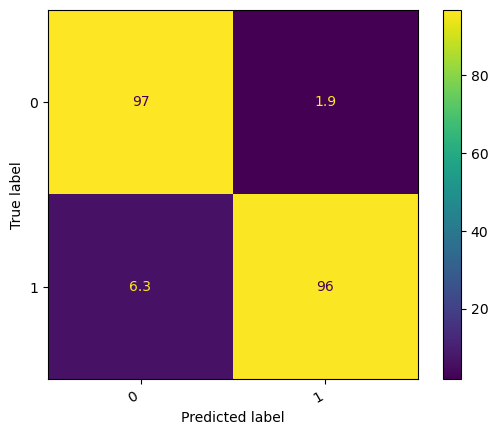

In [14]:
cm=confusion_matrix(y_test, y_pred, labels=clf.classes_)/confusion_matrix(y_test, y_pred, labels=clf.classes_).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_).plot()
plt.xticks(rotation=30,ha="right")
plt.show()

In [15]:
### Atención William y todos....!!!!! LA(S) PREGUNTA(S).....
### 1. Guardar el modelo....
import pickle
# save the model to disk
filename = 'modelo_de_cancer.mod'
pickle.dump(clf, open(filename, 'wb'))

In [16]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [17]:
### 2. Predecir datos nuevos....

In [18]:
caracteristicas=[16.5,13.8,100.3,924.8,0.13426,0.1767,0.53,0.234,0.005,0.4567,
                13.2,9.4,120.5,1045.8,0.33426,0.5767,0.053,0.1234,0.105,0.3567,
                26.7,20.9,256.2,1500.3,0.73426,0.98767,0.763,0.934,0.5,0.9567]

In [19]:
loaded_model.predict(np.array(caracteristicas).reshape(1, -1))

array([0])

In [1]:
## Tarea: Cambiar el conjunto de datos y practicar. También prácticar con hypertunning parameters....
#kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
#gamma : {'scale', 'auto'}

### ¿Habrá alguna combinación que de mejor precisión??????

In [4]:
# Lo que queremos hacer es usar el modelo de SVM con el conjunto de datos de los frijoles....
# 1. Cargar los datos
datos=pd.read_excel("Dry_Bean_Dataset.xlsx")
datos

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
# Data Mining...
# Eliminar la variable "Bean ID"...
datos=datos.drop(columns="Bean ID")
datos

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
# Cuantos hay de cada clase????
datos["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [7]:
# 2. Separar variables: un conjunto de independientes (X) y un conjunto de dependientes (y)
X=datos.drop(columns="Class")
y=datos["Class"]

In [8]:
#y

In [9]:
# 3. Separar y dividir el conjunto de datos X e y en conjunto de entrenamiento y conjunto de prueba.
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set ()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22) 

In [10]:
# 4. Identificar el modelo, en este caso SVM
# 4.1. Cargar el modelo """vacío"""
#Import svm model
from sklearn import svm
#Create a svm Classifier
modelo_frijol = svm.SVC(random_state=22)
#{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
#{'scale', 'auto'}

In [11]:
# 4.2. Entrenar el modelo
modelo_frijol.fit(X_train,y_train)

SVC(random_state=22)

In [12]:
# 4.3. Hacer la predicción
y_pred=modelo_frijol.predict(X_test)

In [13]:
y_pred

array(['DERMASON', 'BARBUNYA', 'CALI', ..., 'HOROZ', 'DERMASON', 'SIRA'],
      dtype=object)

In [14]:
y_test

11784    DERMASON
7337        HOROZ
4184         CALI
4997         CALI
4020         CALI
           ...   
4193         CALI
11880    DERMASON
2118     BARBUNYA
246         SEKER
5965        HOROZ
Name: Class, Length: 1362, dtype: object

In [15]:
# 5. Evaluar el modelo
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, f1_score
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.643906020558003
F1 Score: 0.6800895753115356


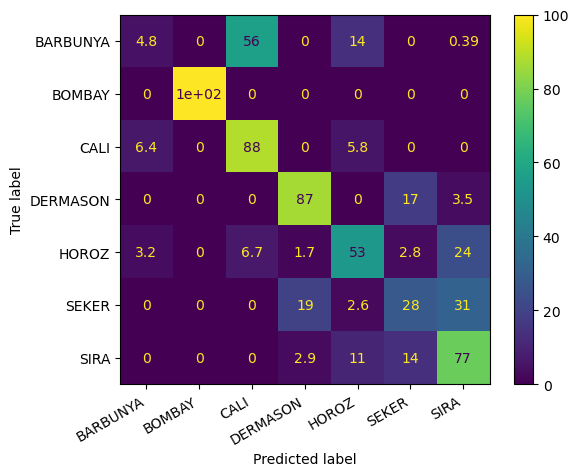

In [17]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
cm=confusion_matrix(y_test, y_pred, labels=modelo_frijol.classes_)/confusion_matrix(y_test, y_pred, labels=modelo_frijol.classes_).sum(axis=1)*100
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelo_frijol.classes_).plot()
plt.xticks(rotation=30,ha="right")
plt.show()

In [18]:
# Comb1: "linear","scale" --> 91.92%
# Comb2: "linear","auto" --> 91.92%
# Comb3: "poly","scale" --> %
# Comb4: "poly","auto" --> %
# Seguir por favor....

In [23]:
X_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11784,31675,653.568,233.573638,173.135688,1.349079,0.671233,32010,200.822963,0.786996,0.989535,0.931848,0.859784,0.007374,0.002486,0.739229,0.997278
7337,65587,1010.572,408.414466,207.231692,1.970811,0.861707,66766,288.977442,0.801974,0.982341,0.807036,0.707559,0.006227,0.000963,0.500640,0.986667
4184,67909,1003.736,389.097059,225.409806,1.726176,0.815104,69501,294.048337,0.710561,0.977094,0.847029,0.755720,0.005730,0.001153,0.571112,0.985841
4997,79392,1092.181,417.060032,245.778180,1.696896,0.807906,80913,317.938727,0.804084,0.981202,0.836368,0.762333,0.005253,0.001094,0.581152,0.986155
4020,64072,962.350,355.087366,232.266919,1.528790,0.756398,65356,285.620385,0.761773,0.980354,0.869385,0.804367,0.005542,0.001431,0.647005,0.989136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,68020,1007.399,396.924249,221.094104,1.795273,0.830500,69372,294.288555,0.753885,0.980511,0.842255,0.741422,0.005835,0.001088,0.549707,0.986875
11880,32038,675.473,239.963049,170.613836,1.406469,0.703192,32573,201.970415,0.747259,0.983575,0.882387,0.841673,0.007490,0.002319,0.708413,0.996361
2118,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
246,34761,687.872,229.737021,192.887573,1.191041,0.543203,35171,210.378421,0.776817,0.988343,0.923181,0.915736,0.006609,0.002867,0.838572,0.998774


In [25]:
import pickle
# load the model from disk
loaded_model = pickle.load(open("modelo_frijol_2.mod", 'rb'))
y_pred = loaded_model.predict(X_test)

In [26]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.92143906020558
F1 Score: 0.9216706735920069
